In [2]:
!pip install datasets

     |████████████████████████████████| 311 kB 4.8 MB/s 
     |████████████████████████████████| 212 kB 26.4 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 52.0 MB/s 
     |████████████████████████████████| 134 kB 45.1 MB/s 
     |████████████████████████████████| 271 kB 53.3 MB/s 
     |████████████████████████████████| 94 kB 563 kB/s 
     |████████████████████████████████| 144 kB 50.3 MB/s 


In [3]:
import numpy as np
import pandas as pd
import re
import string
import datasets
from datasets import load_dataset
from datasets import load_from_disk
from datasets import Dataset
from scipy import stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from collections import Counter 

In [4]:
def generate_word_cloud(dfs):
  # Generate a word cloud image
  text = " ".join( record['sentence'] for record in dfs)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  return text


In [5]:
stopwords = set(STOPWORDS)

In [6]:
stopwords.update(["user", "number", "people", "hashtag", "rt","co"])

In [7]:
twitter_df= pd.read_csv('/content/drive/MyDrive/Dissertation/labeled_data.csv')

In [8]:
twitter_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [9]:

twitter_df = twitter_df.rename(columns={"class": "label", "tweet":"sentence"})
twitter_df['token_count'] = twitter_df['sentence'].apply(lambda x: len(x.split())) 
twitter_df['character_count'] = twitter_df['sentence'].apply(lambda x: len(x)) 

<Figure size 432x288 with 0 Axes>

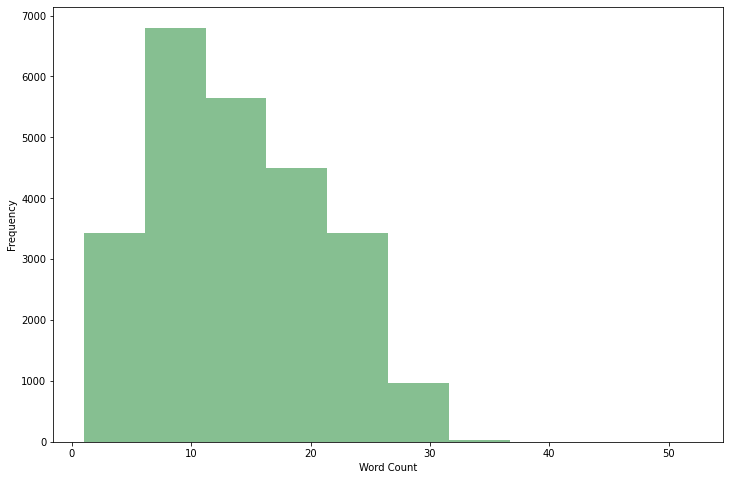

In [10]:
plt.figure()
plot = twitter_df.plot(y="token_count", bins=10,grid=False, figsize=(12,8), color='#86bf91', legend=False, kind="hist")
plot.set_xlabel("Word Count")
plt.show()

<Figure size 432x288 with 0 Axes>

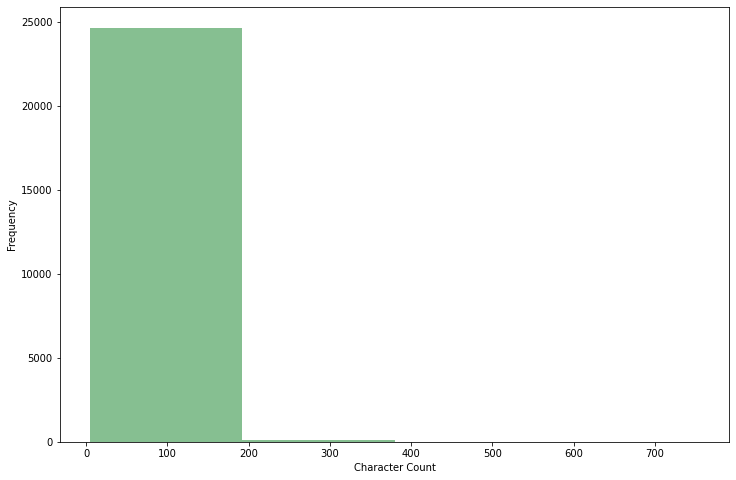

In [11]:
plt.figure()
plot = twitter_df.plot(y="character_count", bins=4,grid=False, figsize=(12,8), color='#86bf91', legend=False, kind="hist")
plot.set_xlabel("Character Count")
plt.show()

In [12]:
merged_dfs = Dataset.from_pandas(twitter_df)
merged_dfs

Dataset({
    features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'label', 'sentence', 'token_count', 'character_count'],
    num_rows: 24783
})

In [13]:
print("Max tokens: " , np.max(merged_dfs['token_count']))


Max tokens:  52


In [14]:
hate_speech  = merged_dfs.filter(lambda example: example['label'] == 0)
hate_speech_ambiguous  = merged_dfs.filter(lambda example: example['label'] == 0 and example['hate_speech'] != example['count'])
normal  = merged_dfs.filter(lambda example: example['label'] == 2)
offensive  = merged_dfs.filter(lambda example: example['label'] == 1)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

In [15]:
len(hate_speech_ambiguous)

1167

In [16]:
print("Hate Speech Records", len(hate_speech))
print("Offensive Records", len(offensive))
print("Normal", len(normal))

Hate Speech Records 1430
Offensive Records 19190
Normal 4163


In [17]:
def sort_by_value( dict_object):

  sort_values = sorted(dict_object.items(), key=lambda x: x[1], reverse=True)
  loop_count =0
  for i in sort_values:
    print(i[0], i[1])
    loop_count = loop_count+1
    if(loop_count > 10):
        break
  return sort_values

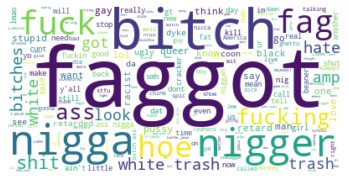

In [18]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in hate_speech)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

RT 327
faggot 253
bitch 194
nigga 185
nigger 164
fuck 117
co 114
fag 112
hoe 98
fucking 95
ass 92


In [20]:
count = 0;
for row in offensive:
  if "nigga" in row['sentence'] and count < 60 and row["count"] == row['offensive_language']:
      if count> 20:
        print("Count: ", row['count'], "Offensive", row['offensive_language'],":", row["sentence"])
      count+=1

Count:  3 Offensive 3 : "Don't make me make you fall in live with a nigga like meee..." The birds 1&amp;2 are my favorite songs by Weeknd
Count:  3 Offensive 3 : "For every bad bitch there is a nigga tired of fucking her"
Count:  3 Offensive 3 : "I guess this is the night bitches die...!!!!" Stewie is that nigga...!
Count:  3 Offensive 3 : "This is for all the fans that waited, the bitch niggas that hated / Old hoes we dated, look mama, we&#8230; http://t.co/sNRY6A7VYB
Count:  3 Offensive 3 : #pause but niggas is bitches tho RT @CornerBoyP: Boy niggaz b so bitch made u cud kiss em n da mouth!!
Count:  3 Offensive 3 : $60 torch down the drain cause either I was to high and lost it or one of my "niggas" finessed that hoe fuckkkkk ittt
Count:  3 Offensive 3 : &#128129;&#128513;&#128586;- lmao my nigga . Let's go half on a weed brownie &#128553; we will be laughing hard as hell in senior seminar
Count:  3 Offensive 3 : &#128514;&#128514; My stomach in pain like a mufucka RT @OwIPharaoh Thi

In [ ]:
count = 0;
for row in hate_speech:
  if "faggot" in row['sentence'] and count < 30 and row["count"] == row['hate_speech']:
      print("Count: ", row['count'], "Hate", row['hate_speech'],":", row["sentence"])
      count+=1

Count:  3 Hate 3 : "We hate niggers, we hate faggots and we hate spics"-kkk rally
Count:  3 Hate 3 : &#8220;@rocafella123 "@waymoflydenu: If fleek in yo vocabulary you a faggot"&#8221;
Count:  3 Hate 3 : &#8220;@waymoflydenu Why yall think its ok to be faggots?&#8221; and want us to be cool with them
Count:  3 Hate 3 : @ChaleCarlo5 fuck outta here and go put some more trash ass ink on your faggot ass self pussy
Count:  3 Hate 3 : @ChaleCarlo5 stay talking defending your fuckboy ass boyfriend or what? go suck him off while youre at it faggot
Count:  3 Hate 3 : @Cheesus85 @greyyygoose faaaaggggottttt, speaking with the blonde hair and confused, you're a hypocrite, cuz you're a faggot
Count:  3 Hate 3 : @Christian_ESEM you don't know what your talking about retarded faggot
Count:  3 Hate 3 : @Hovaa_ shut up lizard faggot nigger cunt
Count:  3 Hate 3 : @HuffingtonPost if the faggots can have a page y cant they?faggots offend me more than them
Count:  3 Hate 3 : @JPantsdotcom @Todd__Kincann

In [23]:
normal['sentence'][0:20]

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 '" momma said no pussy cats inside my doghouse "',
 '"@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF" woof woof hot scally lad',
 '"@AllAboutManFeet: http://t.co/3gzUpfuMev" woof woof and hot soles',
 '"@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes." One oreo? Lol',
 '"@ArizonasFinest6: Why the eggplant emoji doe?"y he say she looked like scream lmao',
 '"@BabyAnimalPics: baby monkey bathtime http://t.co/7KPWAdLF0R"\nAwwwwe! This is soooo ADORABLE!',
 '"@DomWorldPeace: Baseball season for the win. #Yankees" This is where the love started',
 '"@DunderbaIl: I\'m an early bird and I\'m a night owl, so I\'m wise and have worms."',
 '"@EdgarPixar: Overdosing on heavy drugs doesn\'t sound bad tonight." I do that pussy shit every day.',
 '"@El_Grillo1: Pit Bulls Photographed As Lovely Fairy Tale Creatures http://t.co/Q0Sm89oOLh&

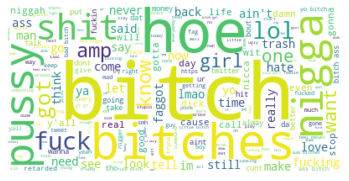

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in offensive)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

bitch 4779
RT 4665
hoe 3246
bitches 2162
nigga 1523
co 1488
pussy 1458
shit 1010
fuck 999
lol 788
got 733


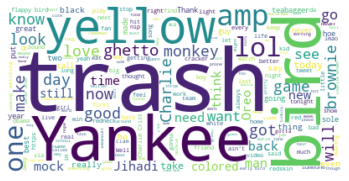

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in normal)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)


RT 1184
co 889
trash 566
bird 331
Yankee 290
yellow 187
amp 177
lol 147
one 138
ghetto 113
now 110
